<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Ken!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
    
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>     


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
 
Hello Ken, 
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. You can find my more detailed feedaback within your project file in the `Reviewer's comment v1` section.
    
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for going an extra mile and making changes in your project.

Now everything is perfect. No critial issues left, so your project has been accepted!
    
Wish you cool projects in the next sprints! ☘️   

# Introduction

We've been given online sales data from Ice, a worldwide video game retailer. We've been tasked with identifying patterns that determine whether a game is successful or not. We can plan advertising campaigns accordingly, potentially spotting hit games ahead of time.

Our data is from 2016; we are planning a hypothetical campaign for 2017.

The data is in a file called `games.csv`, which includes the following: 

- Name 
- Platform 
- Year_of_Release 
- Genre 
- NA_sales (North American sales in USD million) 
- EU_sales (sales in Europe in USD million) 
- JP_sales (sales in Japan in USD million) 
- Other_sales (sales in other countries in USD million) 
- Critic_Score (maximum of 100) 
- User_Score (maximum of 10) 
- Rating (ESRB)

Additionally, we have been asked to test two specific hypotheses:

- "Average user ratings of the Xbox One and PC platforms are the same."
- "Average user ratings for the Action and Sports genres are different."

Let's start by taking a cursory look at the data:

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you've added additional information about the project goal. Could be also helpful to share steps you will complete.

</div>

In [1]:
import pandas as pd #general data handling package
from scipy import stats as st #functions for testing statistical hypotheses
from matplotlib import pyplot as plt #for data visualization
import numpy as np #general math

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Looks like there aren't immediate problems with the CSV file (such as an unusual delimiter).

For reasons of stylistic consistency, we'll convert the column names to lowercase. 

The year-of-release should probably also be converted to an integer, since years are never really rendered in decimals. Critic scores are also often rendered as an integer out of 100, but I'll have to take a closer look to make sure that's the case.

In [4]:
df.columns = df.columns.str.lower()
df['year_of_release'] = df['year_of_release'].astype('Int64') #version of 'int' that handles missing values
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Regarding the column names change, everything is correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

</div>

<div class="alert alert-info">I didn't feel it was necessary to mention snake_case specifically, for the exact reason that the column names already had the underscores in them--only a capitalization correction was necessary. You are correct though.</div>     


In [5]:
np.array_equal(df['critic_score'].dropna(), df['critic_score'].dropna().astype('Int64'))

True

Since the above cell returns True, we know that converting `critic_score` to an Int64 won't truncate any of the numbers in that column. If `dropna()` were removed, it'd return False, but that's just because NaN does not equal itself, nor does it equal the `<NA>` you can see below:

In [6]:
df['critic_score'] = df['critic_score'].astype('Int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


Pandas also has a `category` data type. `genre`, `platform`, and `rating` seem like obvious candidates for conversion to this type.

<div class="alert alert-info">Per later reviewer comments, I'm filling in the missing rating-column values here. Doing it later would involve editing the categories as well as the data itself--more steps.</div> 

In [7]:
#filling missing ESRB ratings per reviewer request
df['rating'] = df['rating'].fillna('MISSING_RATING')

In [8]:
df['genre'] = df['genre'].astype('category')
df['platform'] = df['platform'].astype('category')
df['rating'] = df['rating'].astype('category')

Since all the other columns represent strings or floats in a more obvious fashion, there's no reason to do further data conversion. 

(CORRECTION: later in the project, I'll also convert `user_score` to a float.)

Next let's take a look at duplicate and/or missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   Int64   
 9   user_score       10014 non-null  object  
 10  rating           16715 non-null  category
dtypes: Int64(2), category(3), float64(4), object(2)
memory usage: 1.1+ MB


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It could be helpful to check not only the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact. You can check percentage using, for example, this code:
   

    df.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)


<div class="alert alert-info">Oh, this is a helpful shortcut, thanks! I actually have been doing that manually with a calculator (for some reason), which is needlessly clunky.</div>     


<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
👏

There are two missing values in `name`, which I find rather stunning: how do you not even know the name of the game your data represents? `year_of_release` also has a few missing values, representing about 1.6% of the data. Dropping those should have minimal impact. Sometimes games with the same name release in different years (for example *Doom*, which came out in 1993, and its reboot from 2016, which is also titled *Doom*), so this may have a beneficial side effect of catching duplicate values that might otherwise slip past.

The columns representing review scores and ratings are another matter, as their missing values represent a substantial poriton of the data (over half of it for `critic_score`!) These missing values will be left alone for now, and they'll be excluded from any analysis which relies on those values.

Additionally, I've been forewarned that "TBD" is also a value in some of the columns, which wouldn't show up in something like `df.isna().sum()` that checks for missing values programatically.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Could you please replace NaN values in the `rating` column with any placeholder (e.g. "unknown")? If we try to fill in the missing values in other ways, we risk distorting the original data. Additionally, in the next steps of our analysis, we need to analyze the rating by region, and it is preferable to analyze the games without a rating at this stage.

<div class="alert alert-info">The reason I did not do this was because I did not feel it was appropriate to do analysis on data we don't have. It does make sense that games without NA releases wouldn't have an ESRB rating, though, come to think of it. I will actually go up a few cells and do it there, since at this point in the project I've already converted the column to a categorical data type, so it's more hassle to do it here.</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Thanks for sharing your reasoning; in practice usually it helps to fill such big gaps in data with some placeholder to keep track of this `unknown` cohort.

In [10]:
df = df.dropna(subset=['name', 'year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  category
 2   year_of_release  16444 non-null  Int64   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   Int64   
 9   user_score       9839 non-null   object  
 10  rating           16444 non-null  category
dtypes: Int64(2), category(3), float64(4), object(2)
memory usage: 1.2+ MB


As for duplicate values, checking for those will help us deal with the `TBD` issue. There are a few thousand duplicate-`name` games, but this makes sense when you consider that some games release across multiple platforms (one notorious example is *The Elder Scrolls V: Skyrim*, which has been released for three generations of Playstation and Xbox consoles, as well as Windows, Nintendo Switch, and VR headsets).

So how many duplicate games are there in the data when accounting for platforms?

In [11]:
print('Duplicate game titles on the same platform:', df.duplicated(subset=['name', 'platform']).sum())

Duplicate game titles on the same platform: 3


In [12]:
df[df.duplicated(subset=['name', 'platform'], keep=False) == True].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


So *Need for Speed: Most Wanted* appears to have been rereleased under the same title for the same platforms in 2012. Since the amount of data in question is extremely small, I took the liberty of looking this specific title up, and it's in a similar situation to *Doom*: the 2012 release is a different game from the 2005 one, even though some of the available platforms overlap.

*Madden NFL 13* appears to be an actual duplicate; since the extra row's sales figures are near-zero and its scores and ESRB rating are identical, I have no qualms with dropping that row from the data.

In [13]:
df = df.drop(16230)
df[df.duplicated(subset=['name', 'platform'], keep=False) == True].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T


Let's also take a look at `value_counts()` across many columns to see what else comes up.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  category
 2   year_of_release  16443 non-null  Int64   
 3   genre            16443 non-null  category
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     7982 non-null   Int64   
 9   user_score       9838 non-null   object  
 10  rating           16443 non-null  category
dtypes: Int64(2), category(3), float64(4), object(2)
memory usage: 1.2+ MB


In [15]:
df['platform'].value_counts().sort_values(ascending=False)

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [16]:
df['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     652
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: Int64

In [17]:
df['genre'].value_counts().sort_values(ascending=False)

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [18]:
df['rating'].value_counts().sort_values(ascending=False)

MISSING_RATING    6676
E                 3920
T                 2905
M                 1536
E10+              1393
EC                   8
K-A                  3
AO                   1
RP                   1
Name: rating, dtype: int64

The only oddity I spot from here is right at the end: the ESRB rating "RP" stands for "Rating Pending," which usually is only applied to games that haven't released yet. I'm curious what we might find by looking at that row.

In [19]:
df[df['rating'] == 'RP'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP


*Supreme Ruler: Cold War* is rated E10+ per the ESRB's website. As this is only one game with a minimal sales impact, I'm not going to do anything to it, but I do think it calls into question the data gathering methods. Nothing I can do about that, though.

Importantly, we still haven't found the `TBD` entries mentioned in the project instructions. If any of the numerical columns had "TBD" as a value in a row, `pandas` would have parsed those columns as objects rather than floats or integers. And one of them did: `user_score`. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  category
 2   year_of_release  16443 non-null  Int64   
 3   genre            16443 non-null  category
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     7982 non-null   Int64   
 9   user_score       9838 non-null   object  
 10  rating           16443 non-null  category
dtypes: Int64(2), category(3), float64(4), object(2)
memory usage: 1.2+ MB


In [21]:
df_tbd = df[df['user_score'].str.upper() == 'TBD']
print('Rows where user_score is TBD:', df_tbd.shape[0])
df_tbd.head()

Rows where user_score is TBD: 2376


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E


Seems to me the easiest thing to do for those 2376 rows is to change 'tbd' to NaN, then run `astype('float')`.

In [22]:
df['user_score'] = df['user_score'].where(df['user_score'].str.upper() != 'TBD', 'NaN').astype('float')
#note that the above line fails if this cell is run repeatedly; use Kernel -> Restart & Run All
#this is because str.upper() throws if called on a float

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  category
 2   year_of_release  16443 non-null  Int64   
 3   genre            16443 non-null  category
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     7982 non-null   Int64   
 9   user_score       7462 non-null   float64 
 10  rating           16443 non-null  category
dtypes: Int64(2), category(3), float64(5), object(1)
memory usage: 1.2+ MB


We've replaced the roughly 2400 user scores that were marked `tbd` with NaN, allowing us to convert to float. I added `str.upper()` to ensure any variations on capitalization were caught.

I'm fairly confident that any anomalies in the original data have been dealt with at this point.

We can also do some feature engineering, adding new columns that may help us see the data from new angles. The main obvious one is `total_sales`, which we can generate as follows:

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,MISSING_RATING,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,MISSING_RATING,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,MISSING_RATING,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,MISSING_RATING,28.31


In [24]:
df['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [25]:
df['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Another idea for a possibly useful column is 'average_score', which computes the average of the critic and user scores. The obvious issue with this is that user scores run on a smaller scale than critic scores. This can be solved just by multiplying by ten. Doing it like this requires making the assumption that user scores are out of 10 while critic scores are out of 100, which is technically not stated anywhere. It doesn't strike me as a huge leap to make, though.

For rows that only have one or the other type of score, I will leave the values missing. For any future questions that rely on average score, I don't think it makes sense to include entries where half of that entry is missing.

In [26]:
df['average_score'] = (df['critic_score'] + df['user_score'] * 10) / 2

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,average_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,78.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,MISSING_RATING,40.24,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,82.5
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,MISSING_RATING,31.38,<NA>
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,MISSING_RATING,30.26,<NA>
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80,87.0
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91,62.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32,85.5
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,MISSING_RATING,28.31,<NA>


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Great, everything is correct here. 

Btw you can also achieve the same by using 

`df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)`

One last feature I'd like to engineer is what I'm tentatively calling `critic_score_gap`, which is the difference between critic scores and user scores (again, multiplying the latter by 10). A positive value would indicate that the title did better with critics than with users, while a negative value would indicate that users posted higher scores for the title than critics did. This could have marketing implications--for example, a title with relatively good user scores but poor critic scores might indicate some sales were driven by word-of-mouth, while the opposite might indicate that game's sales were driven by professional reviews.

In [27]:
df['critic_score_gap'] = df['critic_score'] - df['user_score'] * 10
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,average_score,critic_score_gap
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,78.0,-4.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,MISSING_RATING,40.24,<NA>,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,82.5,-1.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,80.0,0.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,MISSING_RATING,31.38,<NA>,<NA>
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,MISSING_RATING,30.26,<NA>,<NA>
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80,87.0,4.0
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91,62.0,-8.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32,85.5,3.0
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,MISSING_RATING,28.31,<NA>,<NA>


# Data analysis

Here are some general questions about the data that could use answers:

- How many games were released in a given year? Do we have more data in some years than others?
- Which platforms have the best sales? In what years were they most popular? How long does it take for a platform to be superseded by newer alternatives?
- Given part of the point of the project is to model sales for the upcoming year, 2017, what years should we actually include in our analysis?
- Which platforms have the best sales in that time range? Which ones are growing or shrinking?
- What does the box plot of global game sales per platform look like? Are there big differences by platform? 
- How do reviews and sales correlate for any one popular platform?
    - Considering the specific games on that platform, do they also sell well when they're released on other platforms?
- Which genres tend to sell the best?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              16443 non-null  object  
 1   platform          16443 non-null  category
 2   year_of_release   16443 non-null  Int64   
 3   genre             16443 non-null  category
 4   na_sales          16443 non-null  float64 
 5   eu_sales          16443 non-null  float64 
 6   jp_sales          16443 non-null  float64 
 7   other_sales       16443 non-null  float64 
 8   critic_score      7982 non-null   Int64   
 9   user_score        7462 non-null   float64 
 10  rating            16443 non-null  category
 11  total_sales       16443 non-null  float64 
 12  average_score     7982 non-null   Float64 
 13  critic_score_gap  7982 non-null   Float64 
dtypes: Float64(2), Int64(2), category(3), float64(6), object(1)
memory usage: 1.6+ MB


"Number of games released by year" shouldn't be too difficult a figure to get. To make things slightly more accurate, we'll want to account for not only year, but also name--otherwise games with multi-platform releases will be overrepresented.

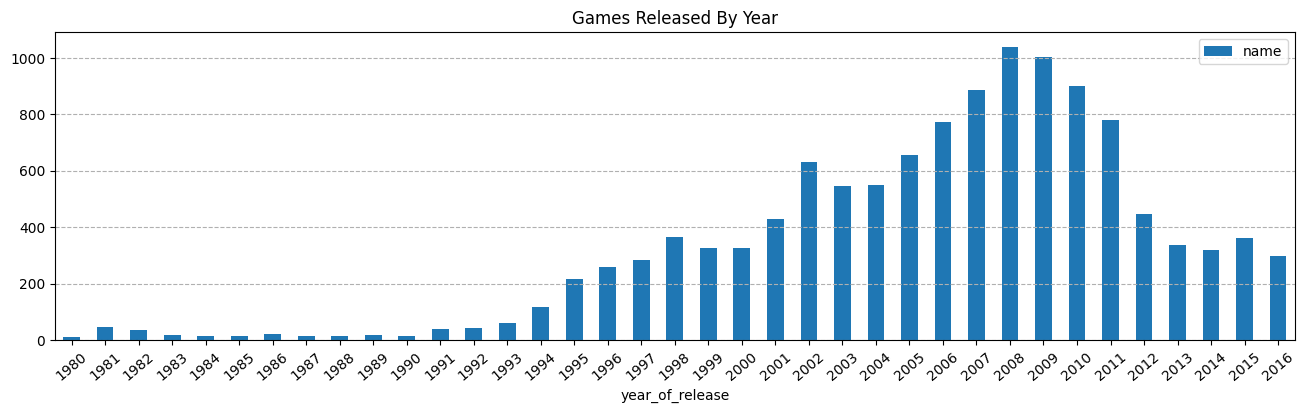

In [29]:
games_per_year = df.drop_duplicates(subset=['name', 'year_of_release']).groupby(['year_of_release']).count().reset_index()

games_per_year.plot(title='Games Released By Year', x='year_of_release', y='name', rot=40, kind='bar',
                   figsize=[16,4])
plt.grid(axis='y', linestyle='--')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1995.

</div>

Our data mostly contains games from 2002 through 2011, especially 2006-2011.

In order to model sales in 2017, we need to have some understanding of the nature of platforms.

In [30]:
sales_by_platform = df.groupby('platform').sum()

sales_by_platform['total_sales'].sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

There are six platforms in the data that show massively higher sales than the rest. PS2 stands alone at the top, with X360, PS3, and Wii sales being relatively close in a second tier, and DS and PS being noticably behind those three. The next most game-selling platform, the PS4, sees a drop of more than 50%, so let's cut at PS.

In [31]:
top_selling_plats = sales_by_platform['total_sales'].sort_values(ascending=False).iloc[0:6].index \
    .remove_unused_categories().array

top_selling_plats

df_plat_years = df.where(df['platform'].isin(top_selling_plats), np.NaN).dropna(subset=['total_sales'])

df_plat_years['platform'] = df_plat_years['platform'].cat.remove_unused_categories()

df_plat_years = df_plat_years.groupby(['year_of_release', 'platform']).sum() \
#     .where(top_selling_plat_years['total_sales'] > 0, np.NaN)

df_plat_years = df_plat_years.where(df_plat_years['total_sales'] > 0).dropna()

df_plat_years

na_sales  eu_sales  jp_sales  other_sales  \
year_of_release platform                                              
1985            DS            0.00      0.00      0.02         0.00   
1994            PS            1.76      1.20      2.67         0.40   
1995            PS           14.61      9.85      9.54         1.96   
1996            PS           45.42     25.92     17.82         5.54   
1997            PS           58.06     37.14     33.10         7.87   
...                            ...       ...       ...          ...   
2015            Wii           0.43      0.62      0.00         0.09   
                X360          7.36      3.50      0.00         1.10   
2016            PS3           0.67      1.26      1.30         0.37   
                Wii           0.06      0.11      0.00         0.01   
                X360          0.69      0.71      0.00         0.12   

                          critic_score  user_score  total_sales  \
year_of_release platform                                          
1985            DS                   0         0.0         0.02   
1994            PS                  69         6.3         6.03   
1995            PS                   0         0.0        35.96   
1996            PS                 539        50.0        94.70   
1997            PS                1271       110.5       136.17   
...                                ...         ...          ...   
2015            Wii                  0         0.0         1.14   
                X360                 0       137.9        11.96   
2016            PS3                  0        39.7         3.60   
                Wii                  0         0.0         0.18   
                X360                 0        29.2         1.52   

                          average_score  critic_score_gap  
year_of_release platform                                   
1985            DS                  0.0               0.0  
1994            PS                 66.0               6.0  
1995            PS                  0.0               0.0  
1996            PS                519.5              39.0  
1997            PS               1107.5               5.0  
...                                 ...               ...  
2015            Wii                 0.0               0.0  
                X360                0.0               0.0  
2016            PS3                 0.0               0.0  
                Wii                 0.0               0.0  
                X360                0.0               0.0  

[67 rows x 9 columns]

I'm a bit confused why the DS (a Nintendo handheld from the 2000s) apparently had at least one game released in 1985:

In [32]:
df[(df['year_of_release'] == 1985) & (df['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,average_score,critic_score_gap
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,MISSING_RATING,0.02,<NA>,<NA>


This title is extremely obscure, and I had some difficulty tracking down a release date for it--I believe this is a translated name for *Saikyou Toudai Shogi DS*, which released in 2007. While I could choose to fix this row, I'm not 100% certain I'm correct there.

I'm going to remove this game from the data, and I have to again express concern about the validity of the data I've been given.

In [33]:
df = df.drop(15957) #fails if this cell is run multiple times; reset kernel and run all

#remaking df_plat_years

sales_by_platform = df.groupby('platform').sum()

top_selling_plats = sales_by_platform['total_sales'].sort_values(ascending=False).iloc[0:6].index \
    .remove_unused_categories().array

top_selling_plats

df_plat_years = df.where(df['platform'].isin(top_selling_plats), np.NaN).dropna(subset=['total_sales'])

df_plat_years['platform'] = df_plat_years['platform'].cat.remove_unused_categories()

df_plat_years = df_plat_years.groupby(['year_of_release', 'platform']).sum() 

df_plat_years = df_plat_years.where(df_plat_years['total_sales'] > 0).dropna().reset_index()

df_plat_years

,year_of_release,platform,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,average_score,critic_score_gap
0,1994,PS,1.76,1.20,2.67,0.40,69,6.3,6.03,66.0,6.0
1,1995,PS,14.61,9.85,9.54,1.96,0,0.0,35.96,0.0,0.0
2,1996,PS,45.42,25.92,17.82,5.54,539,50.0,94.70,519.5,39.0
3,1997,PS,58.06,37.14,33.10,7.87,1271,110.5,136.17,1107.5,5.0
4,1998,PS,83.22,48.74,28.48,9.05,2019,194.0,169.49,1894.0,-92.0
...,...,...,...,...,...,...,...,...,...,...,...
61,2015,Wii,0.43,0.62,0.00,0.09,0,0.0,1.14,0.0,0.0
62,2015,X360,7.36,3.50,0.00,1.10,0,137.9,11.96,0.0,0.0
63,2016,PS3,0.67,1.26,1.30,0.37,0,39.7,3.60,0.0,0.0
64,2016,Wii,0.06,0.11,0.00,0.01,0,0.0,0.18,0.0,0.0


This seems like a good place for a chart: how are these sales distributed across years?

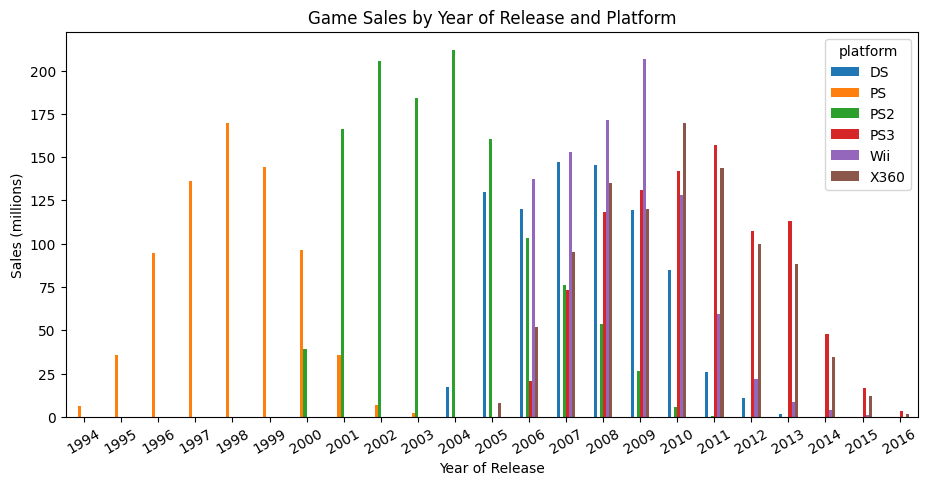

In [34]:
df_plat_years.pivot(columns=['platform'], index='year_of_release') \
    .plot(kind='bar', title='Game Sales by Year of Release and Platform',
         y='total_sales', figsize=[11, 5], rot=30,
         xlabel='Year of Release', ylabel='Sales (millions)')

plt.show()

Of the six platforms that drove the most game sales, four of them (the PS3, Wii, and Xbox 360 consoles, and the DS handheld) were in their prime during relatively similar times. The original Playstation and the PS2 preceded them, of course. However, all of them were falling off by the time our data concludes in 2016.

Let's look at the ranges individually:

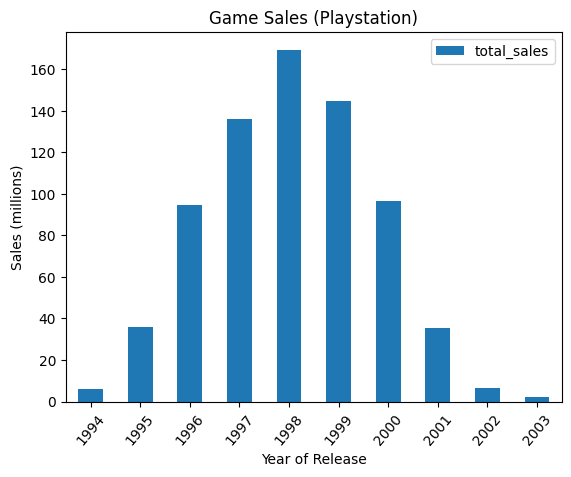

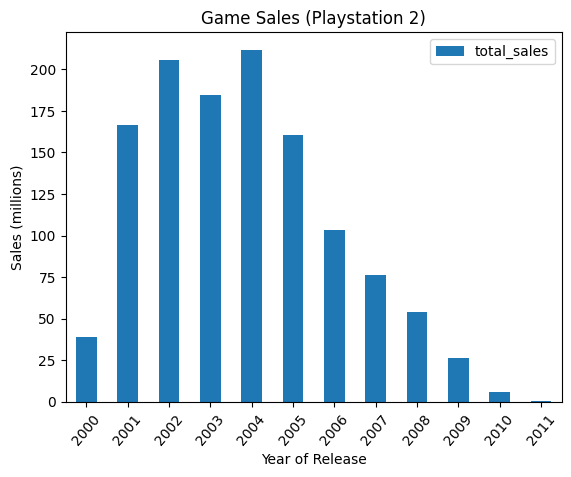

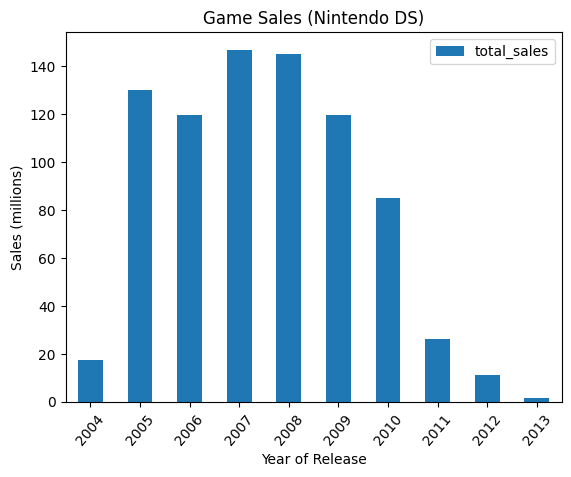

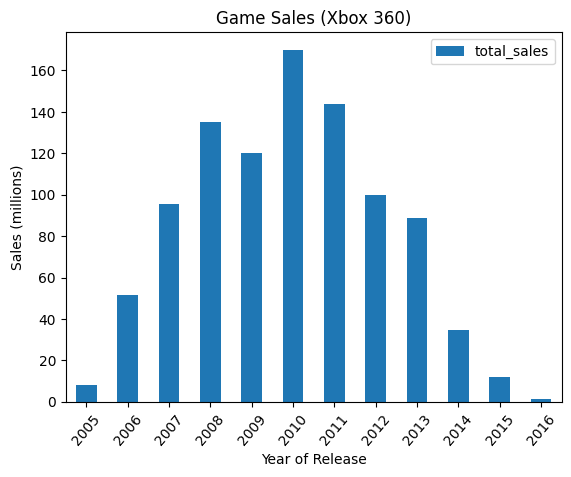

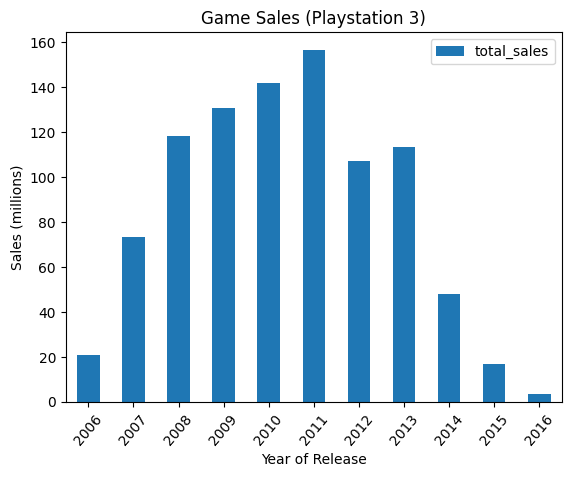

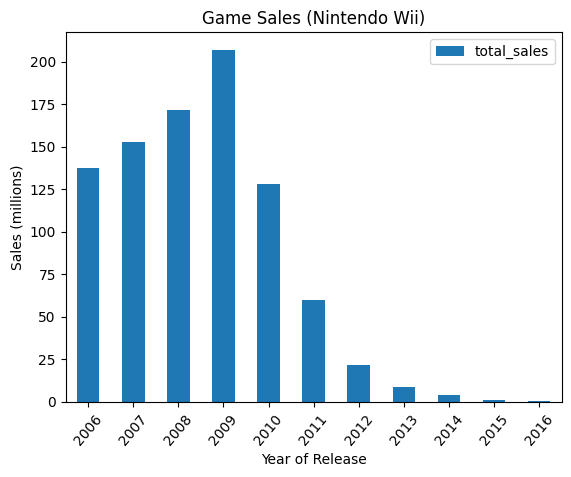

In [35]:
df_py_ps = df_plat_years[df_plat_years['platform'] == 'PS']
df_py_ps2 = df_plat_years[df_plat_years['platform'] == 'PS2']
df_py_ds = df_plat_years[df_plat_years['platform'] == 'DS']
df_py_x360 = df_plat_years[df_plat_years['platform'] == 'X360']
df_py_ps3 = df_plat_years[df_plat_years['platform'] == 'PS3']
df_py_wii = df_plat_years[df_plat_years['platform'] == 'Wii']

df_py_ps.plot(kind='bar', title='Game Sales (Playstation)', x='year_of_release', y='total_sales',
             xlabel='Year of Release', ylabel='Sales (millions)', rot=50)

df_py_ps2.plot(kind='bar', title='Game Sales (Playstation 2)', x='year_of_release', y='total_sales',
             xlabel='Year of Release', ylabel='Sales (millions)', rot=50)

df_py_ds.plot(kind='bar', title='Game Sales (Nintendo DS)', x='year_of_release', y='total_sales',
             xlabel='Year of Release', ylabel='Sales (millions)', rot=50)

df_py_x360.plot(kind='bar', title='Game Sales (Xbox 360)', x='year_of_release', y='total_sales',
             xlabel='Year of Release', ylabel='Sales (millions)', rot=50)

df_py_ps3.plot(kind='bar', title='Game Sales (Playstation 3)', x='year_of_release', y='total_sales',
             xlabel='Year of Release', ylabel='Sales (millions)', rot=50)

df_py_wii.plot(kind='bar', title='Game Sales (Nintendo Wii)', x='year_of_release', y='total_sales',
             xlabel='Year of Release', ylabel='Sales (millions)', rot=50)



plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
That is a nice way to check platform life cycle. We can see that only a small subset of platform still has sales.

This format makes it a bit clearer what the typical sales lifetime of a platform is. A platform gets roughly 5-7 years of peak popularity before seeing a drastic drop-off as newer generations of hardware release.

Given that we're trying to model sales expectations for 2017, we are likely best off looking at data for platforms that became popular no earlier than 2013. In particular, our data ends at a particularly interesting time for one major console maker: Nintendo released its Switch console in March of 2017, replacing the beleaguered WiiU. This release date was announced well before the point at which our data ends. While we don't have data for 2017 and later, it seems unlikely that the WiiU would generate meaningful amounts of sales in the future. So, while this may go without saying, any conclusions we make about the data with respect to the WiiU should take its imminent replacement into account.

So, let's regard only the data for games released in 2013 and later:

In [36]:
df_recent = df[df['year_of_release'] >= 2013].copy()

df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              2233 non-null   object  
 1   platform          2233 non-null   category
 2   year_of_release   2233 non-null   Int64   
 3   genre             2233 non-null   category
 4   na_sales          2233 non-null   float64 
 5   eu_sales          2233 non-null   float64 
 6   jp_sales          2233 non-null   float64 
 7   other_sales       2233 non-null   float64 
 8   critic_score      991 non-null    Int64   
 9   user_score        1192 non-null   float64 
 10  rating            2233 non-null   category
 11  total_sales       2233 non-null   float64 
 12  average_score     991 non-null    Float64 
 13  critic_score_gap  991 non-null    Float64 
dtypes: Float64(2), Int64(2), category(3), float64(6), object(1)
memory usage: 226.6+ KB


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct and data has been filtered correctly, as we want to evaluate only recent trends. 

In [37]:
df_recent['platform'] = df_recent['platform'].cat.remove_unused_categories()

So, for this new subset of the data: which platforms are leading in sales? Which ones are growing or shrinking?

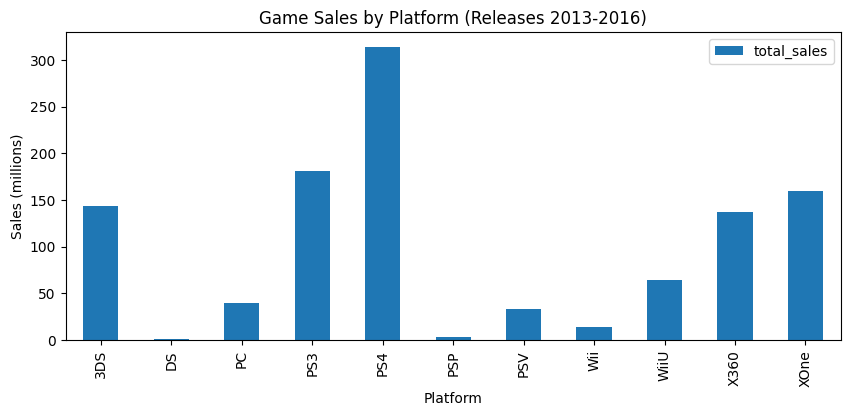

In [38]:
df_recent.groupby('platform').sum().plot(kind='bar', y='total_sales', figsize=[10, 4], 
                                         title='Game Sales by Platform (Releases 2013-2016)',
                                        xlabel='Platform', ylabel='Sales (millions)')

plt.show()

By far the most relevant platform is the PS4, with strong showings from the PS3, Xbox 360, Xbox One, and Nintendo 3DS in the same time frame as well. But this doesn't give us a great sense of the overall direction each platform is going in. For the sake of decluttering, I'm going to remove a few platforms with negligible results as well.

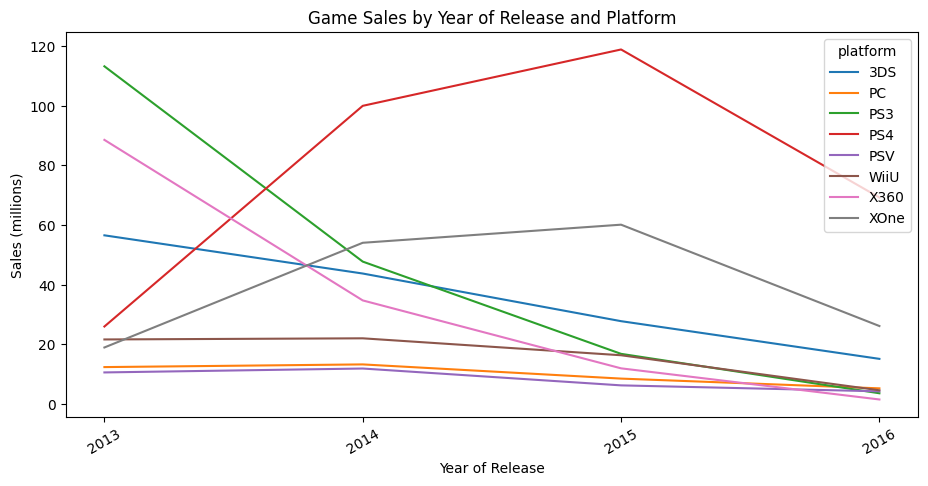

In [39]:
df_recent = df_recent[~df_recent['platform'].isin(['DS', 'PSP', 'Wii'])]
df_recent['platform'] = df_recent['platform'].cat.remove_unused_categories()

df_recent.groupby(['platform', 'year_of_release']).sum().reset_index() \
    .pivot(columns=['platform'], index='year_of_release') \
    .plot(kind='line', title='Game Sales by Year of Release and Platform',
          xticks=[2013, 2014, 2015, 2016],
         y='total_sales', figsize=[11, 5], rot=30,
         xlabel='Year of Release', ylabel='Sales (millions)')

plt.show()

This shows a little more clearly how the trends are moving: almost all platforms saw a drop in 2016 (it is unclear whether this indicates incomplete data or a general decrease in sales across the board), but in 2015 two platforms in particular saw growth compared to the prior year. These are the PS4 and Xbox One, which skyrocketed past PS3 and Xbox 360 sales in 2014. Both consoles released in late 2013, so it's unsurprising to see their sales reflect rapid growth.

The PS3 and Xbox 360, naturally, saw their games' sales nosedive during this time period. The Nintendo 3DS was not superseded by a future handheld; its hardware would not be discontinued until years after our data ends. However, its sales tapered off nonetheless. The Playstation Vita handheld, while never reaching great sales in absolute terms, proved surprisingly resilient. PC gaming was also generally steady. Lastly, the WiiU home console sales were anemic throughout this period, dropping substantially in 2016.

We can get a sense of per-game sales on each platform with a box plot:

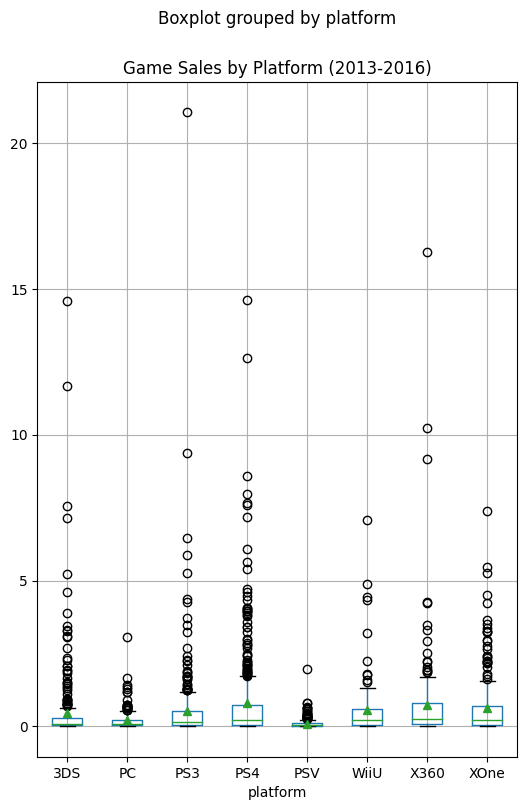

In [40]:
df_recent.boxplot(column='total_sales', by='platform', figsize=[6, 9], showmeans=True)
plt.title('Game Sales by Platform (2013-2016)')
plt.show()

Judging by this box plot, the majority of titles don't put a serious dent in the total sales of a platform. Note that the mean is greater than the median on the most successful platforms in the data. It's a bit hard to tell, though, with how serious some of the outlier titles are. Let's zoom in a little:

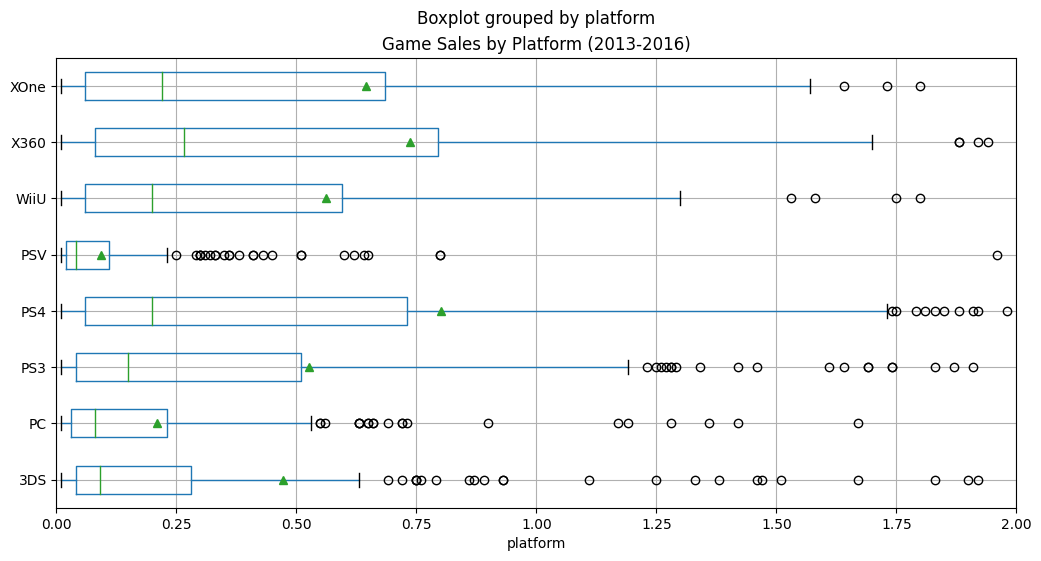

In [41]:
df_recent.boxplot(column='total_sales', by='platform', figsize=[12, 6], showmeans=True, vert=False)
plt.title('Game Sales by Platform (2013-2016)')
plt.xlim(left=0, right=2)
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>

Everything is correct here. 
Additionally you could also hide outliers by adding parameter: `showfliers = False`. 

<div class="alert alert-info">Super useful, thanks!</div> 

This second box plot is significantly easier to read, though we lose a little information about the outliers. The data is skewed positive, sometimes dramatically so--the mean is not only greater than the median on all eight platforms examined, it's actually above the 75th percentile in three cases (the PS3, PS4, and 3DS). This suggests that game sales on a platform are carried by relatively few extremely successful releases, while many games fail to make their mark in the same way.

We can also see that the platform with the highest median sales during this time period was actually the Xbox 360, which also beat every platform's 75th percentile. The PS4 mean sales surpassed it. This might indicate that Microsoft was having some trouble repeating the success with the Xbox One. Meanwhile, the PS4 eclipsed the PS3 during this time period. Nintendo's offerings left them at a distant third place, with WiiU titles looking comparable to the PS3 titles' sales despite the latter having to compete with its own successor for more than three-fourths of the time period examined.

So, next question: do review scores correlate with sales? We can look at critical reviews, user reviews, and the "critic score gap" metric I derived.

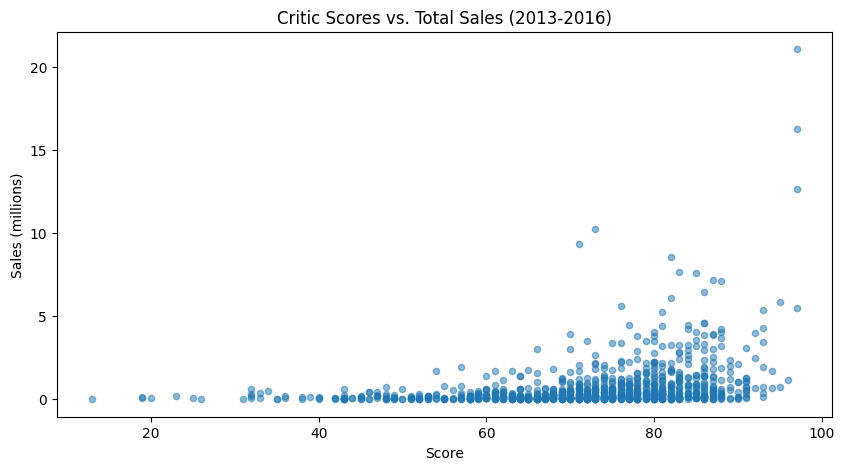

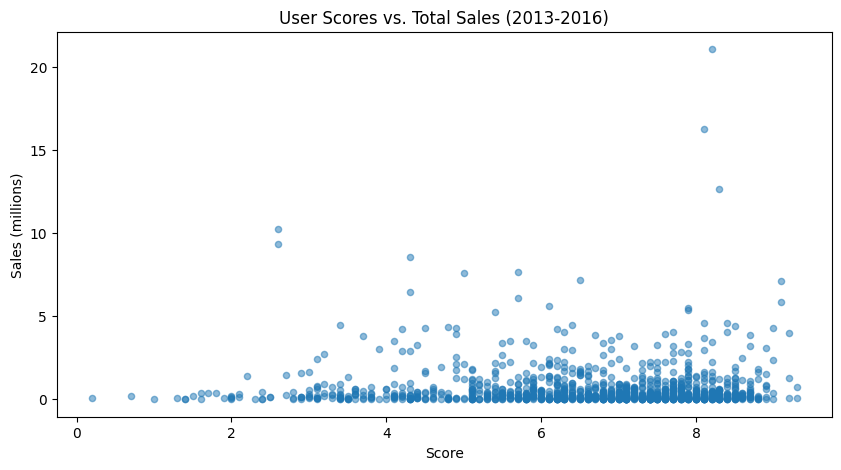

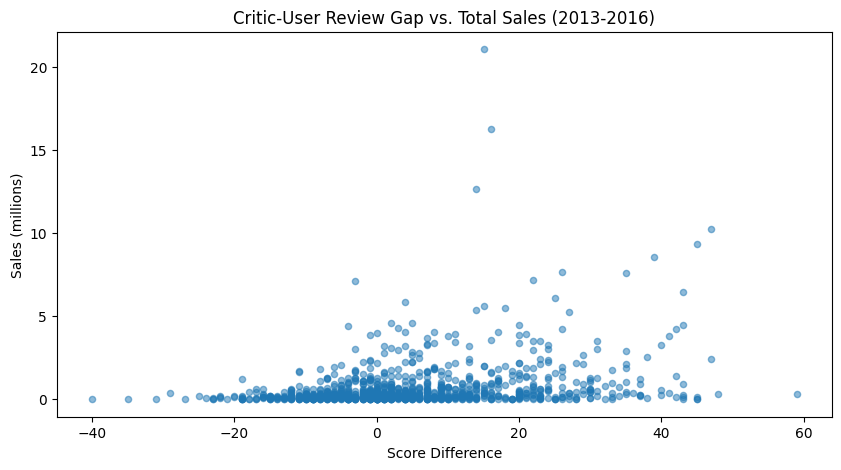

In [42]:
df_recent.plot(kind='scatter', x='critic_score', y='total_sales', title='Critic Scores vs. Total Sales (2013-2016)',
              figsize=[10,5], alpha=0.5, xlabel='Score', ylabel='Sales (millions)')
df_recent.plot(kind='scatter', x='user_score', y='total_sales', title='User Scores vs. Total Sales (2013-2016)',
              figsize=[10,5], alpha=0.5, xlabel='Score', ylabel='Sales (millions)')
df_recent.plot(kind='scatter', x='critic_score_gap', y='total_sales', 
               title='Critic-User Review Gap vs. Total Sales (2013-2016)',
              figsize=[10,5], alpha=0.5, xlabel='Score Difference', ylabel='Sales (millions)')
plt.show()

Visually, we can see most high-selling games have high critical review scores, while the correlation is less obvious for user review scores. However, many highly-reviewed games on both metrics sell poorly, so high review scores don't necessarily drive sales on their own. 

As for the "critic score gap," remember that positive values reflect games that reviewed better with critics, while negative values reflect games that reviewed better with users. It seems as though the highest-selling games had positive values here, but then again, it also looks like most games in general have a positive score gap.

We can add context if we calculate the correlation coefficients for all three metrics:

In [43]:
print('Table of Pearson correlation coefficients:')
df_recent[['critic_score', 'user_score', 'critic_score_gap', 'total_sales']].corr(method='pearson')

Table of Pearson correlation coefficients:


,critic_score,user_score,critic_score_gap,total_sales
critic_score,1.000000,0.502354,0.376084,0.313789
user_score,0.502354,1.000000,-0.612256,-0.003712
critic_score_gap,0.376084,-0.612256,1.000000,0.288997
total_sales,0.313789,-0.003712,0.288997,1.000000


Total sales have a weak positive correlation with critic scores, but basically no correlation with user scores. The critic score gap was a very slightly worse predictor of sales than just the critic scores, but neither is particularly strong.

We can also do this by specific platform; in this case I'll choose the PS4, since it seems to be generally quite successful during our chosen time period.

In [44]:
df_recent_ps4 = df_recent[df_recent['platform'].isin(['PS4'])]
#df_recent_ps4.info(0) #over 250 games with non-null values in either critic or user score
print('Table of Pearson correlation coefficients:')
df_recent_ps4[['critic_score', 'user_score', 'critic_score_gap', 'total_sales']].corr(method='pearson')


Table of Pearson correlation coefficients:


,critic_score,user_score,critic_score_gap,total_sales
critic_score,1.000000,0.557654,0.344438,0.406568
user_score,0.557654,1.000000,-0.587203,-0.031957
critic_score_gap,0.344438,-0.587203,1.000000,0.433835
total_sales,0.406568,-0.031957,0.433835,1.000000


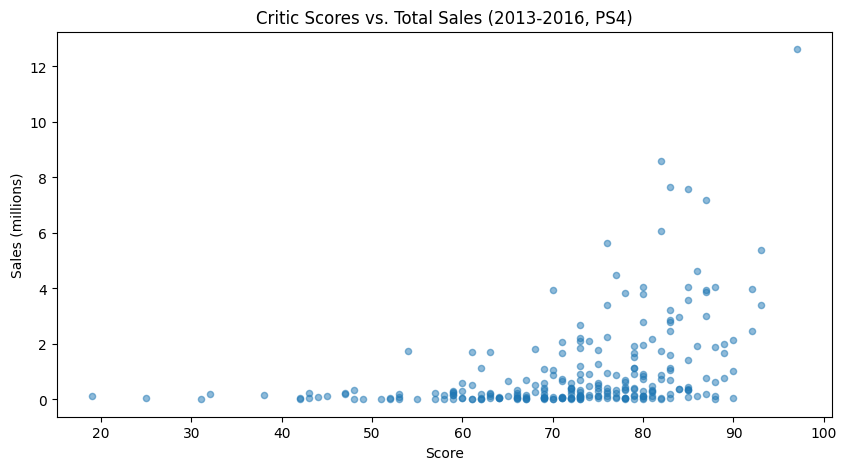

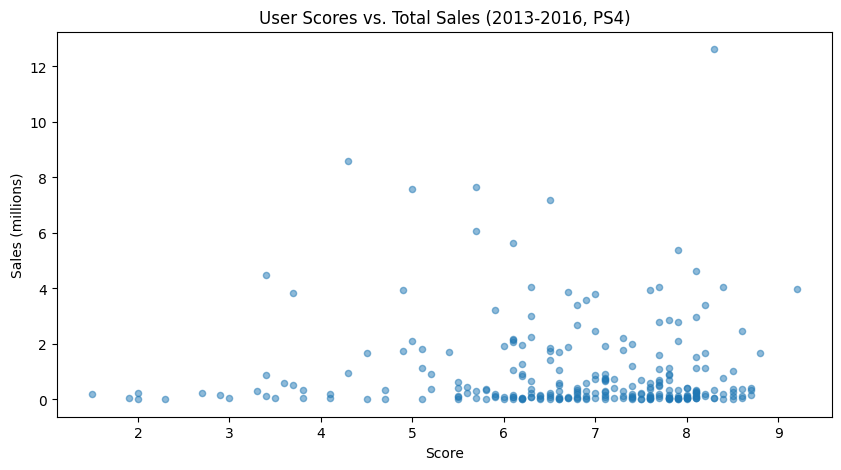

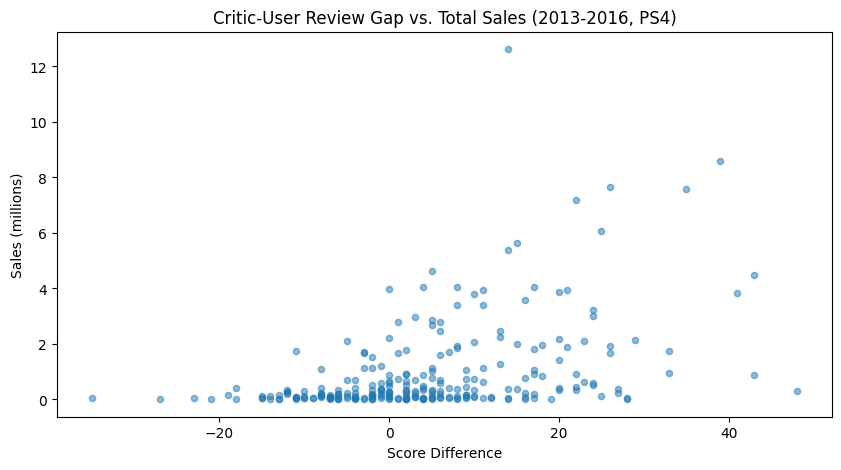

In [45]:
df_recent_ps4.plot(kind='scatter', x='critic_score', y='total_sales', title='Critic Scores vs. Total Sales (2013-2016, PS4)',
              figsize=[10,5], alpha=0.5, xlabel='Score', ylabel='Sales (millions)')
df_recent_ps4.plot(kind='scatter', x='user_score', y='total_sales', title='User Scores vs. Total Sales (2013-2016, PS4)',
              figsize=[10,5], alpha=0.5, xlabel='Score', ylabel='Sales (millions)')
df_recent_ps4.plot(kind='scatter', x='critic_score_gap', y='total_sales', 
               title='Critic-User Review Gap vs. Total Sales (2013-2016, PS4)',
              figsize=[10,5], alpha=0.5, xlabel='Score Difference', ylabel='Sales (millions)')
plt.show()

PS4 sales show a somewhat increased correlation between critic review scores and total sales, as did the score gap.

Here's another question: for games that are sold on multiple platforms, do they sell better on some platforms compared to other ones?

We can derive a list of all multi-platform releases by checking for games with duplicate names, like so:

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


In [46]:
df_recent_multiplat = df_recent[df_recent.duplicated(subset=['name'], keep=False)]
df_recent_multiplat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 16 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1388 non-null   object  
 1   platform          1388 non-null   category
 2   year_of_release   1388 non-null   Int64   
 3   genre             1388 non-null   category
 4   na_sales          1388 non-null   float64 
 5   eu_sales          1388 non-null   float64 
 6   jp_sales          1388 non-null   float64 
 7   other_sales       1388 non-null   float64 
 8   critic_score      752 non-null    Int64   
 9   user_score        938 non-null    float64 
 10  rating            1388 non-null   category
 11  total_sales       1388 non-null   float64 
 12  average_score     752 non-null    Float64 
 13  critic_score_gap  752 non-null    Float64 
dtypes: Float64(2), Int64(2), category(3), float64(6), object(1)
memory usage: 140.7+ KB


Then we can simply create the sales box plots from earlier, using only this subset of the data:

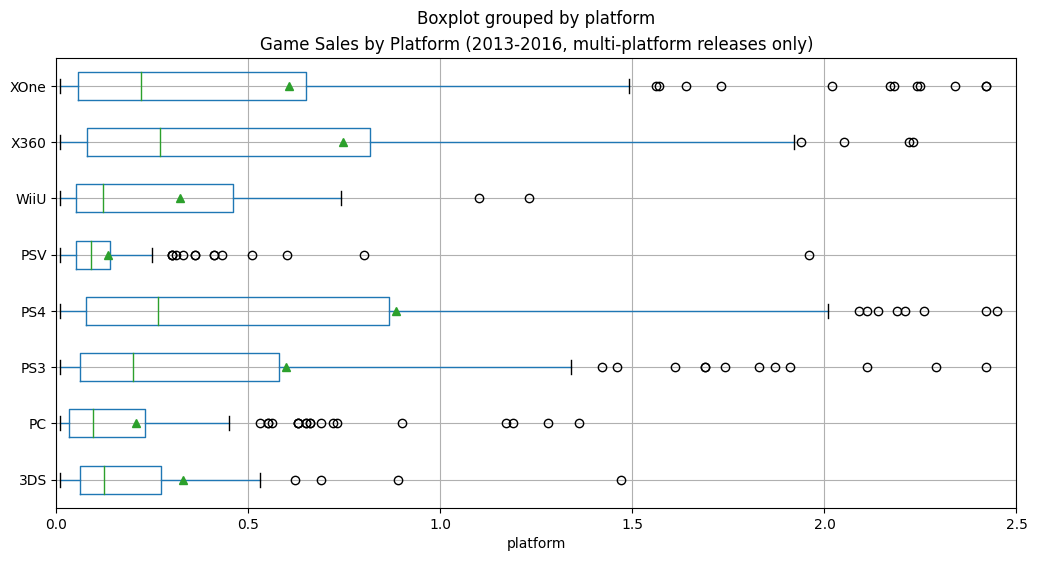

In [47]:
df_recent_multiplat.boxplot(column='total_sales', by='platform', figsize=[12, 6], showmeans=True, vert=False)
plt.title('Game Sales by Platform (2013-2016, multi-platform releases only)')
plt.xlim(left=0, right=2.5)
plt.show()

Once again, plenty of outliers are cut here for the sake of readability, albeit far fewer than the previous box chart. Notably, I actually used a slightly less severe x-axis cutoff this time; the main reason for this was the PS4, where the right whisker on its box plot actually would be off the chart if I used the same x-axis as before.

The story for multi-platform releases isn't that different from the story for games overall: the Xbox 360 and Playstation 4 were both highly successful. Nintendo consoles' sales fell off quite a bit, which is far from an unexpected result for a company that is best known for their consoles' exclusive games such as *Mario* titles.

Another possible angle with this data is genre. Do some genres of games sell better than others?

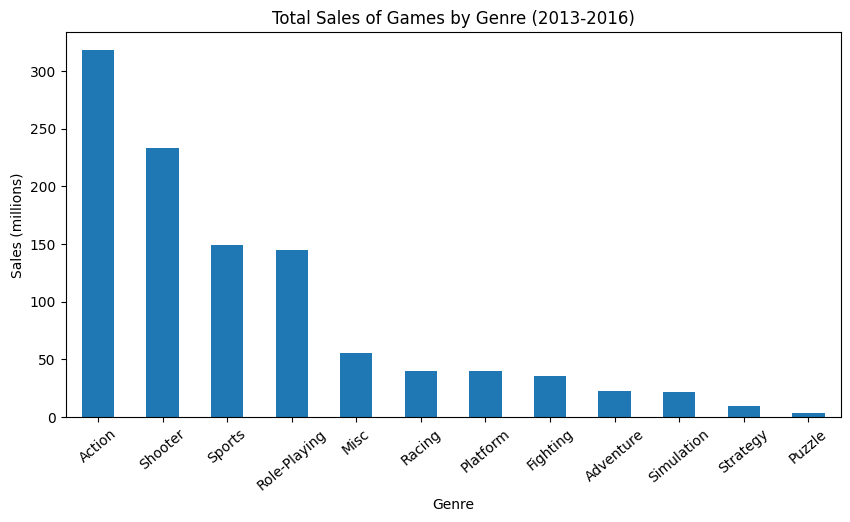

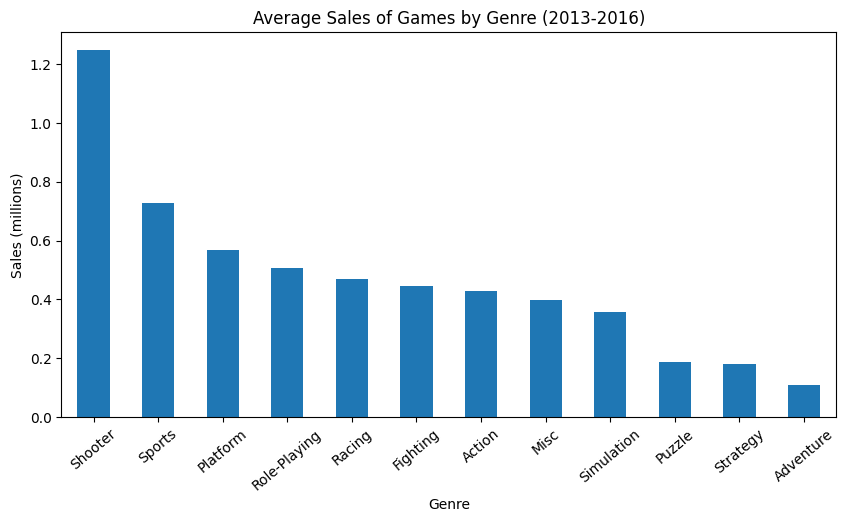

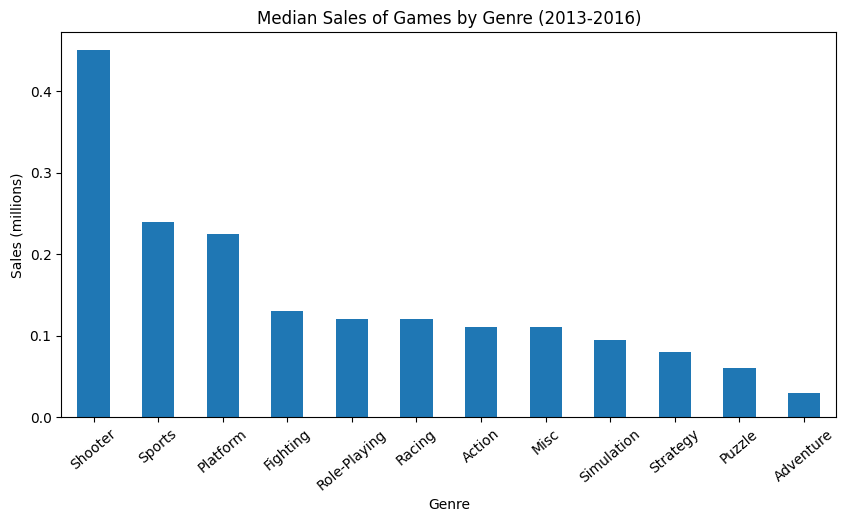

In [48]:
df_recent.groupby('genre').sum().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Total Sales of Games by Genre (2013-2016)', y='total_sales',
                xlabel='Genre', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent.groupby('genre').mean().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by Genre (2013-2016)', y='total_sales',
                xlabel='Genre', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent.groupby('genre').median().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Median Sales of Games by Genre (2013-2016)', y='total_sales',
                xlabel='Genre', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
plt.show()

In terms of the total sales of every game in each genre, the most successful category in sum is "action", followed by "shooter," "sports," and "role-playing" games. 

However, when we look at the average sales, the story is different: only shooters and to a lesser extent sports games get far ahead of the pack, while platformers, role-playing games, racing games, fighting games, action games, "misc," and simulation games all have fairly comparable sales on average. The puzzle, strategy, and adventure genres do not sell well by either metric. 

If we use the median instead of the mean, we get a fairly similar result, with the notable exception that the median platformer sells comparably to the median sports game.

When it comes to individual titles, it seems like shooters are far and away the most popular games during this time period. However, many genres see a fair amount of success, with the top four total-sales genres each breaking 100 million units.

Another big question is the ESRB. Do games with certain ESRB ratings sell better than others? Note that four ESRB ratings (EC, AO, K-A, and RP) have almost no games represented, so I will cut them from this analysis.

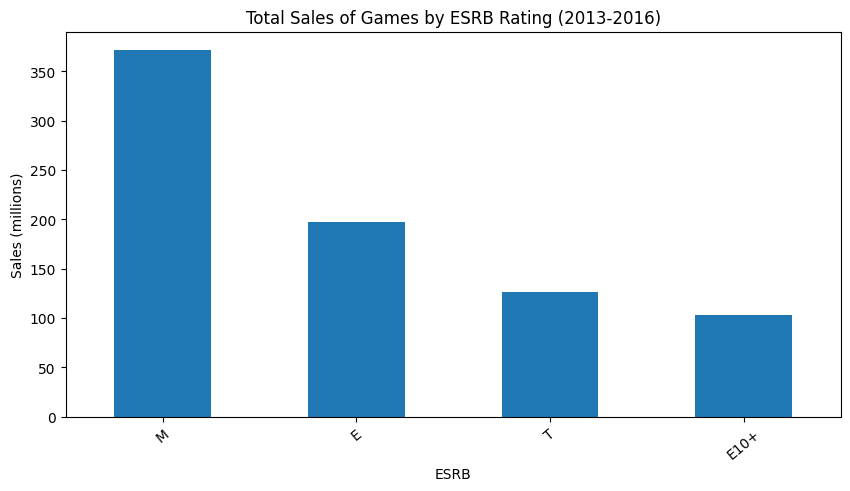

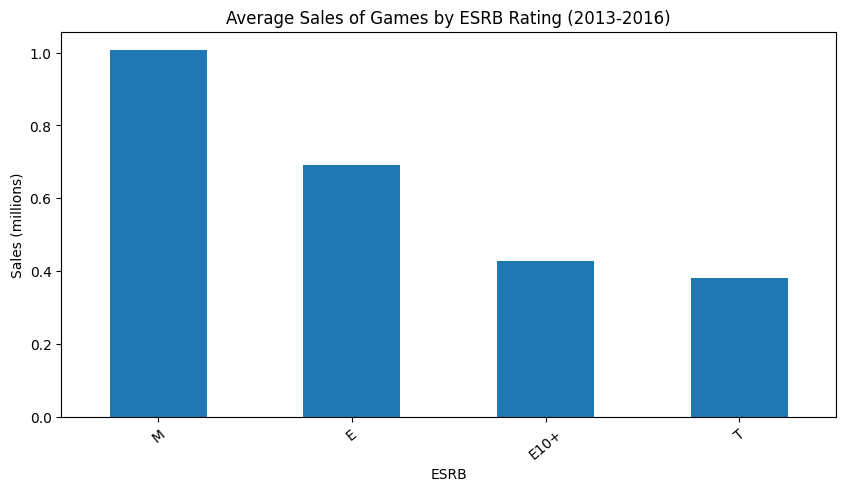

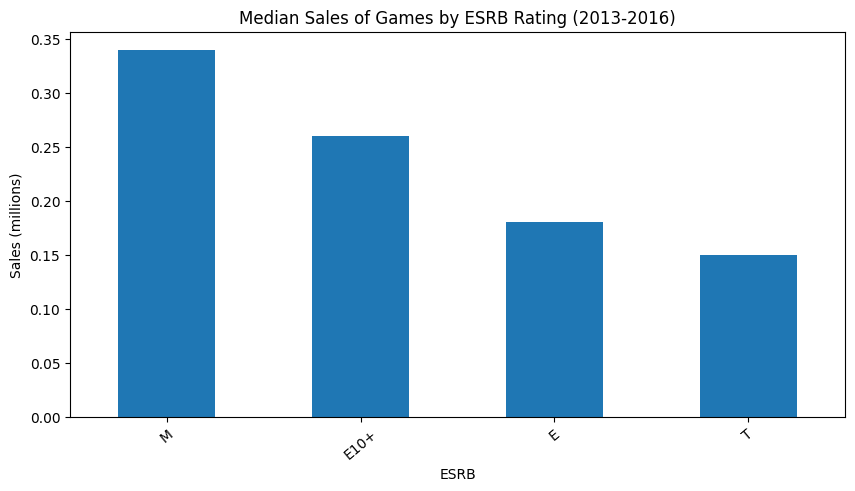

In [49]:
df_recent_esrb = df_recent[df_recent['rating'].isin(['M', 'T', 'E10+', 'E'])].copy()
df_recent_esrb['rating'] = df_recent_esrb['rating'].cat.remove_unused_categories()

df_recent_esrb.groupby('rating').sum().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Total Sales of Games by ESRB Rating (2013-2016)', y='total_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').mean().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating (2013-2016)', y='total_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').median().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Median Sales of Games by ESRB Rating (2013-2016)', y='total_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
plt.show()

M-rated games were very popular in 2013-2016, beating out the other three ratings in total, mean, and median sales. 

The other three shuffle around quite a bit depending on what metric you're looking at; T-rated games did the worst on mean and median sales, but beat out E10+ on total sales. E10+ did the worst on total sales, but beat out both E and T games on median sales. E games had the most total sales of the three and the most average sales, but their median game was worse than E10+.

The gap between M and the other genres was most noticeable in total sales.

The last big question to answer is region specificity. Between NA, EU, and JP, do trends change for platforms, genres, or ESRB ratings?

Let's look at platforms first:

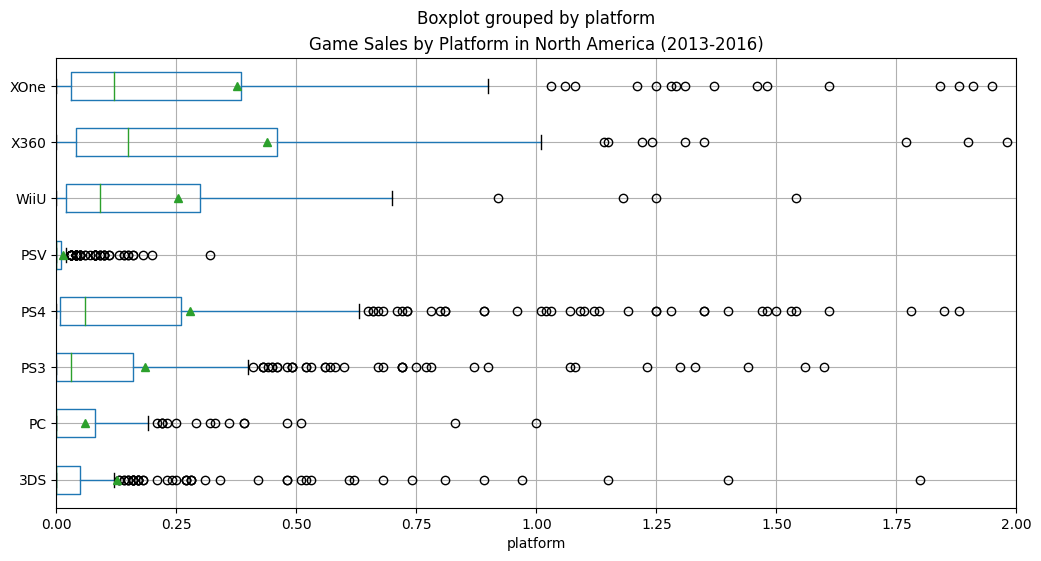

In [50]:
df_recent.boxplot(column='na_sales', by='platform', figsize=[12, 6], showmeans=True, vert=False)
plt.title('Game Sales by Platform in North America (2013-2016)')
plt.xlim(left=0, right=2)
plt.show()

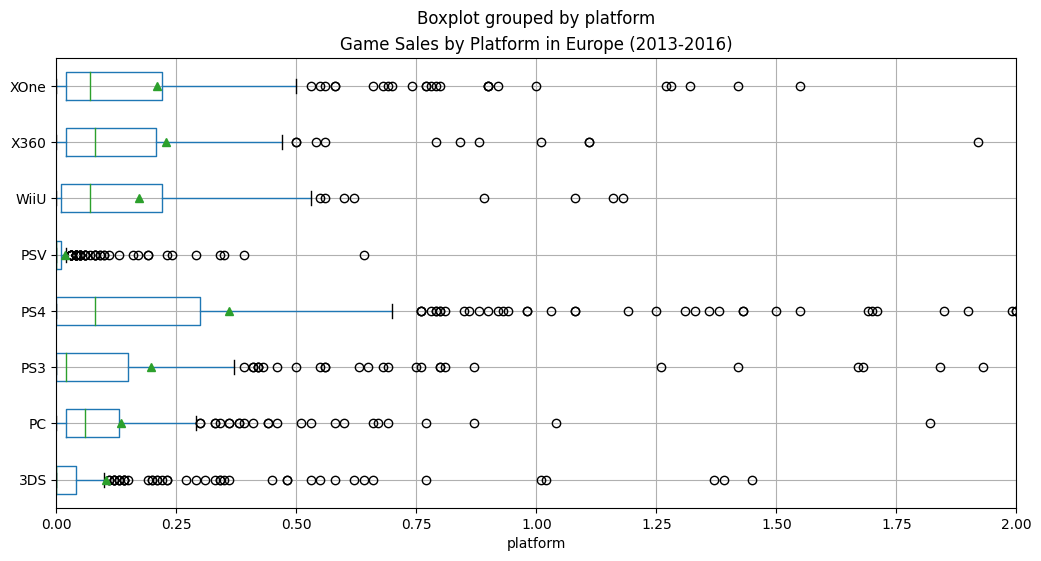

In [51]:
df_recent.boxplot(column='eu_sales', by='platform', figsize=[12, 6], showmeans=True, vert=False)
plt.title('Game Sales by Platform in Europe (2013-2016)')
plt.xlim(left=0, right=2)
plt.show()

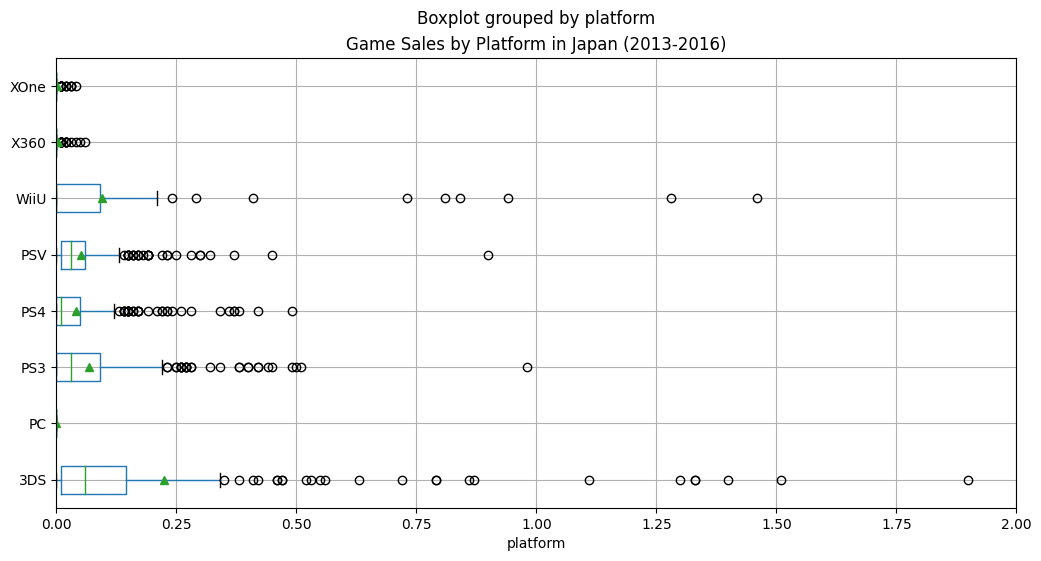

In [52]:
df_recent.boxplot(column='jp_sales', by='platform', figsize=[12, 6], showmeans=True, vert=False)
plt.title('Game Sales by Platform in Japan (2013-2016)')
plt.xlim(left=0, right=2)
plt.show()

Some noteworthy information:

- In general, Japan seems to drive fewer sales than the other two markets.
- For Xbox consoles, North America is their biggest source of success; European sales are milder, and Japanese sales are practically nonexistent.
- For Playstation consoles, the PS4 gained some popularity over the PS3 in Europe, but lost some popularity in Japan.
- In absolute terms, WiiU sales are similar to Xbox consoles in that North America is a somewhat friendlier market than Europe; however, unlike the Xbox consoles, their sales in Japan are competitive with Sony's consoles.
- Handheld gaming is much bigger in Japan than in Europe or North America. The 3DS is the biggest overall platform there, and unlike the general trend, the 3DS and Vita's games outsell EU and NA.
- PC gaming is functionally nonexistent in Japan. PC gaming does somewhat better in Europe than in North America.

When it comes to genre:

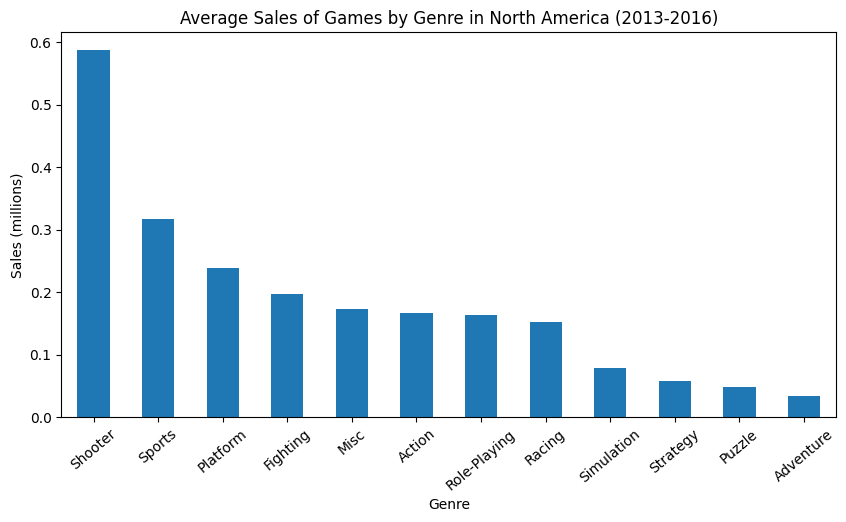

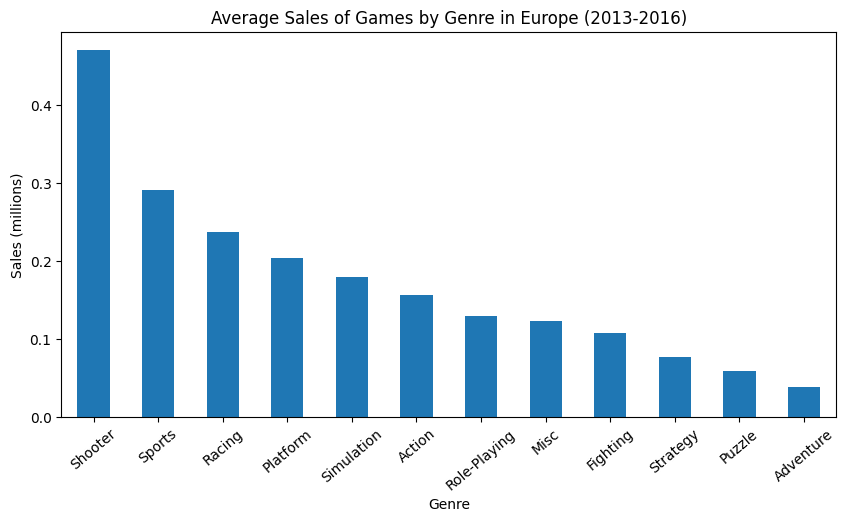

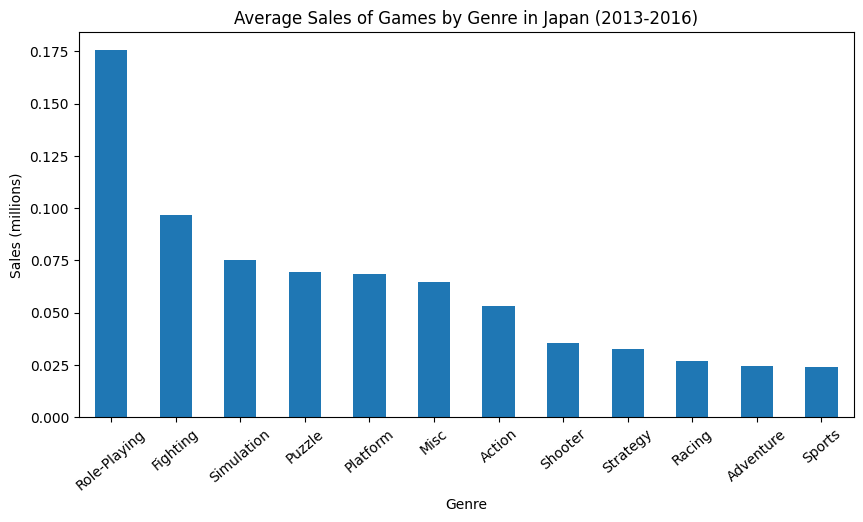

In [53]:
df_recent.groupby('genre').mean().sort_values(by='na_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by Genre in North America (2013-2016)', y='na_sales',
                xlabel='Genre', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent.groupby('genre').mean().sort_values(by='eu_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by Genre in Europe (2013-2016)', y='eu_sales',
                xlabel='Genre', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent.groupby('genre').mean().sort_values(by='jp_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by Genre in Japan (2013-2016)', y='jp_sales',
                xlabel='Genre', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
plt.show()

When it comes to genre, Japan shows much different preferences than Europe and North America. 

- In EU and NA, shooters are by far the most popular genre. In JP, the median shooter (and several other genres) sold literally zero copies, which prompted me to use the mean for this analysis instead.
- Likewise, sports games are very popular in EU and NA but are the least successful genre in JP.
- Role-playing games are the most popular genre in JP, followed by fighting games; these genres are only moderately popular in EU and NA.
- NA and EU show largely similar preferences, with the exceptions of racing and simulation games, which are more popular in Europe than in North America.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Indeed here we have the most popular genre - Action (total revenue) but could results with avg revenue per game/genre are different. 
   

Lastly, how does the ESRB rating affect sales in different regions? Note that the ESRB is generally only used in North America, but similar systems like PEGI exist elsewhere.

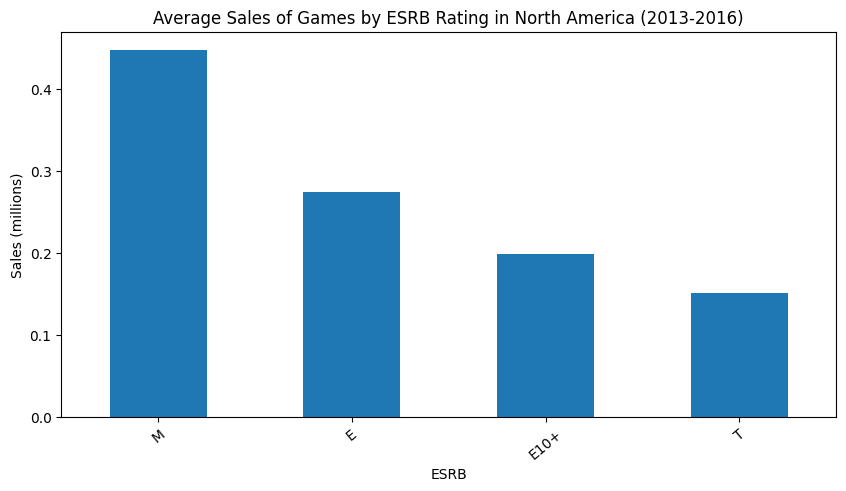

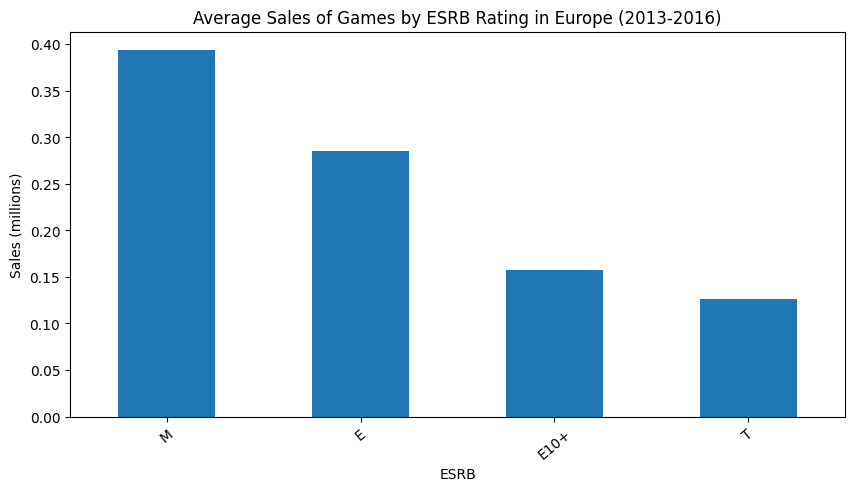

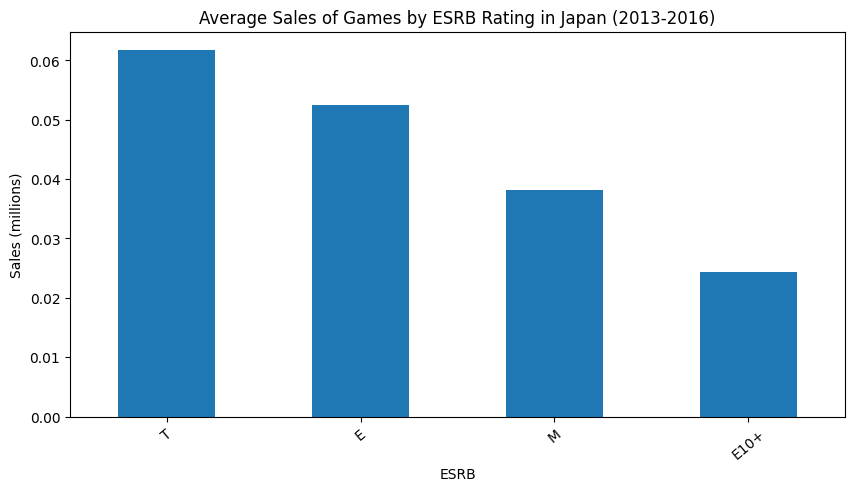

In [54]:
df_recent_esrb.groupby('rating').mean().sort_values(by='na_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating in North America (2013-2016)', y='na_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').mean().sort_values(by='eu_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating in Europe (2013-2016)', y='eu_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').mean().sort_values(by='jp_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating in Japan (2013-2016)', y='jp_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=40, legend=None, figsize=[10, 5])
plt.show()

Again, there's a marked difference between Japan and the other two markets.

- T-rated games are the most popular subset in Japan, but the least popular subset in North America and Europe.
- M-rated games, the most popular category in the other two regions, fell behind E-rated games in Japan.
- E-rated games are the second-most-popular category in all three regions.
- E10+ languishes in last place in Japan, and second-to-last before T in the other two markets.

In [55]:
genres = df_recent[df_recent['rating']=='T'].groupby('genre').count()
print('Role-playing games with a T rating:', genres.iloc[7][0])
print('T-rated games:', genres['name'].sum())
print('Percentage:', genres.iloc[7][0] / genres['name'].sum())

Role-playing games with a T rating: 72
T-rated games: 331
Percentage: 0.2175226586102719


In [56]:
not_t = df_recent[~(df_recent['rating']=='T')].groupby('genre').count()
print('Role-playing games with a rating other than T:', not_t.iloc[7][0])
print('Non-T-rated games:', not_t['name'].sum())
print('Percentage:', not_t.iloc[7][0] / not_t['name'].sum())

Role-playing games with a rating other than T: 213
Non-T-rated games: 1804
Percentage: 0.1180709534368071


My suspicion is that the ESRB trends in Japan are a result of their preference for role-playing games, or vice versa. RPGs are more commonly represented among T-rated games than games of other genres. Is this also true for fighting games?

In [57]:
print('Fighting games with a T rating:', genres.iloc[2][0])
print('T-rated games:', genres['name'].sum())
print('Percentage:', genres.iloc[2][0] / genres['name'].sum())

Fighting games with a T rating: 41
T-rated games: 331
Percentage: 0.12386706948640483


In [58]:
not_t = df_recent[~(df_recent['rating']=='T')].groupby('genre').count()
print('Fighting games with a rating other than T:', not_t.iloc[2][0])
print('Non-T-rated games:', not_t['name'].sum())
print('Percentage:', not_t.iloc[7][0] / not_t['name'].sum())

Fighting games with a rating other than T: 38
Non-T-rated games: 1804
Percentage: 0.1180709534368071


It appears there's little effect on this from the fighting genre. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>

As you've noticed thare are a lot of unknowns in the rating column, especially for Japan. Can you please add it also to the graph?

I think it is a very important information in itself about the market and what rating system is used in this region.

<div class="alert alert-info">Rather than go back and add them, I'll do separate graphs below. My original code specifically looked for the big four ratings, and I'd like to still have that available for comparison's sake.</div> 

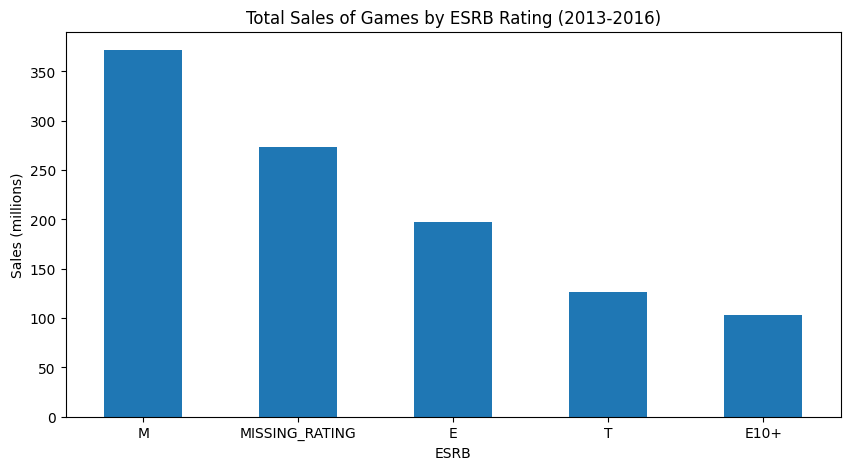

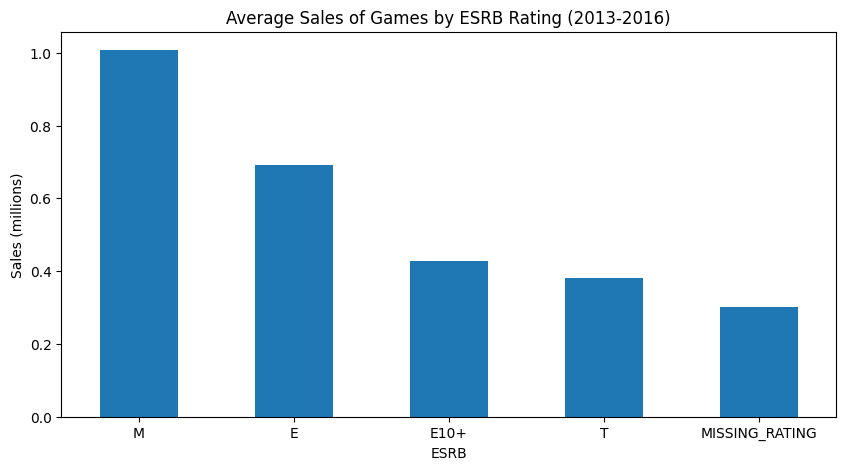

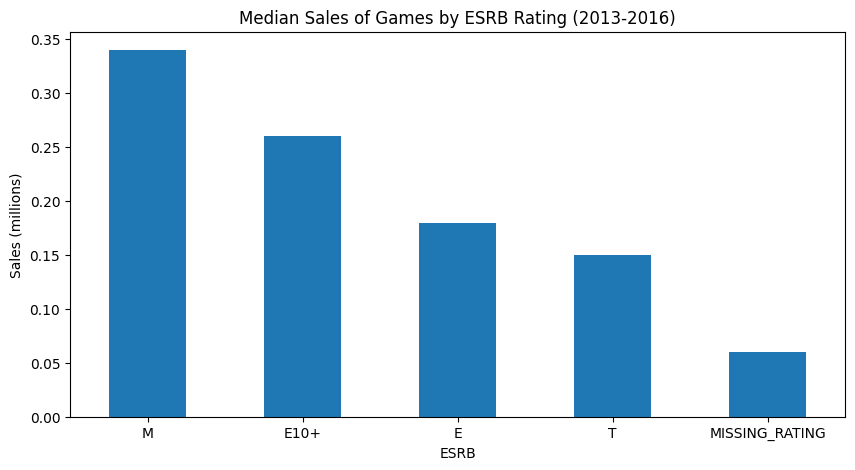

In [59]:
df_recent_esrb = df_recent[df_recent['rating'].isin(['M', 'T', 'E10+', 'E', 'MISSING_RATING'])].copy()
df_recent_esrb['rating'] = df_recent_esrb['rating'].cat.remove_unused_categories()

df_recent_esrb.groupby('rating').sum().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Total Sales of Games by ESRB Rating (2013-2016)', y='total_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=0, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').mean().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating (2013-2016)', y='total_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=0, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').median().sort_values(by='total_sales', ascending=False) \
                .plot(kind='bar', title='Median Sales of Games by ESRB Rating (2013-2016)', y='total_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=0, legend=None, figsize=[10, 5])
plt.show()

<div class="alert alert-info">When games with no ESRB rating information are included, they make up a very high percentage of total sales but a very small percentage by average or median.</div>

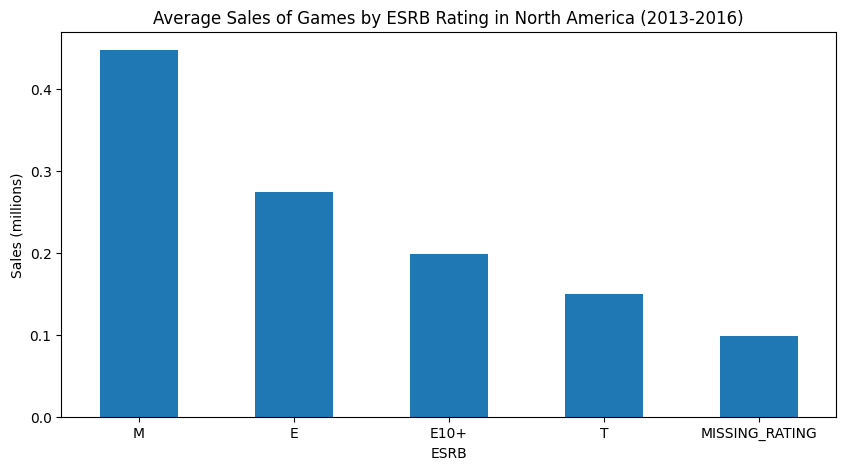

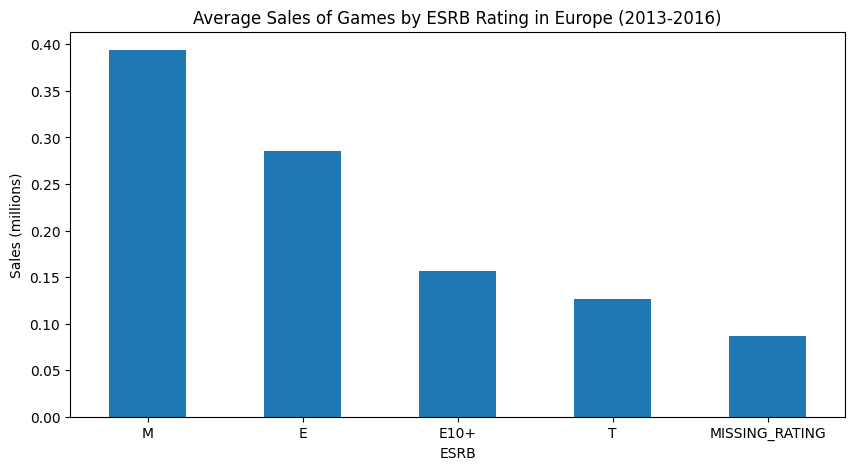

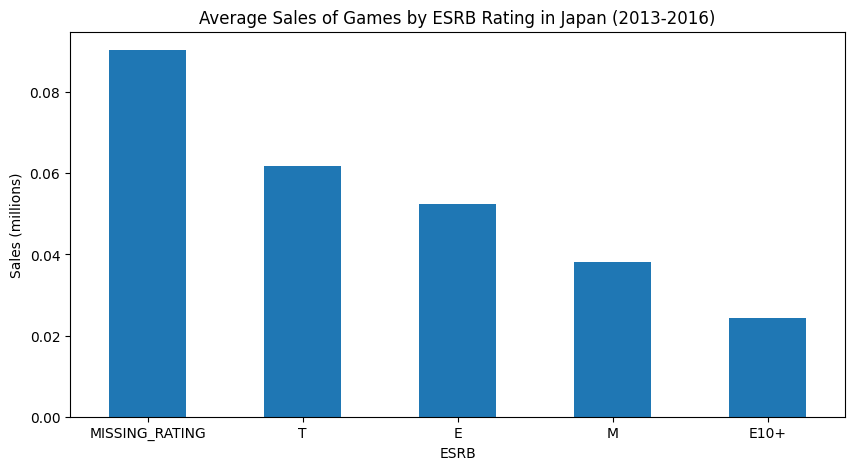

In [60]:
df_recent_esrb.groupby('rating').mean().sort_values(by='na_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating in North America (2013-2016)', y='na_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=0, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').mean().sort_values(by='eu_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating in Europe (2013-2016)', y='eu_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=0, legend=None, figsize=[10, 5])
df_recent_esrb.groupby('rating').mean().sort_values(by='jp_sales', ascending=False) \
                .plot(kind='bar', title='Average Sales of Games by ESRB Rating in Japan (2013-2016)', y='jp_sales',
                xlabel='ESRB', ylabel='Sales (millions)', rot=0, legend=None, figsize=[10, 5])
plt.show()

<div class="alert alert-info">

The vast majority of those unrated game sales come from Japan. 

My hypothesis here would be that, because a game needs to be released in North America to have an ESRB rating, most of the games with no rating information are Japanese exclusives; as far as I'm casually aware, there aren't a lot of games that release in Europe but not NA, so the same effect wouldn't happen from that angle.

In fact, let's test that:</div>

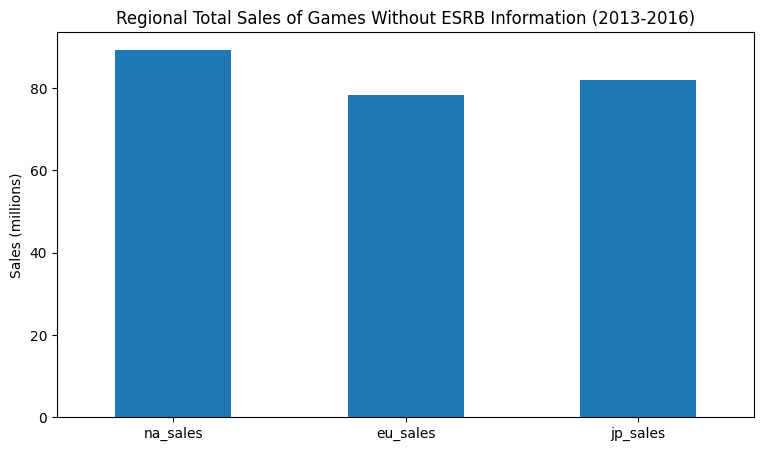

In [61]:
df_recent_missingra = df_recent[df_recent['rating'].isin(['MISSING_RATING'])].copy()
df_recent_missingra.sum()[['na_sales', 'eu_sales', 'jp_sales']]\
         .plot(kind='bar', y=['na_sales', 'eu_sales', 'jp_sales'],
         title='Regional Total Sales of Games Without ESRB Information (2013-2016)',
         figsize=[9, 5], rot=0, ylabel='Sales (millions)')


plt.show()

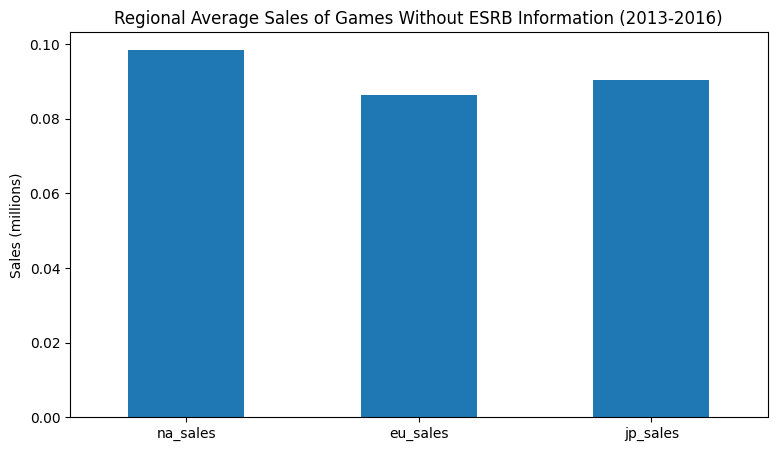

In [62]:
df_recent_missingra.mean()[['na_sales', 'eu_sales', 'jp_sales']]\
         .plot(kind='bar', y=['na_sales', 'eu_sales', 'jp_sales'],
         title='Regional Average Sales of Games Without ESRB Information (2013-2016)',
         figsize=[9, 5], rot=0, ylabel='Sales (millions)')

plt.show()

<div class="alert alert-info">
    My conjecture seems to have not panned out, at least in absolute terms--NA sales still exceeded JP sales in both total and average. Given Japan is a smaller driver of sales than the other two regions, it's still relatively more likely that a game with no ESRB rating in our data sold well in Japan, but we knew that from prior graphs.

That said, look at some of the titles in `df_recent_missingra`:
</div> 

In [63]:
df_recent_missingra.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,average_score,critic_score_gap
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,MISSING_RATING,14.63,<NA>,<NA>
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,MISSING_RATING,14.60,<NA>,<NA>
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,MISSING_RATING,11.68,<NA>,<NA>
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,<NA>,NaN,MISSING_RATING,9.18,<NA>,<NA>
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,MISSING_RATING,7.98,<NA>,<NA>
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,<NA>,NaN,MISSING_RATING,7.55,<NA>,<NA>
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,MISSING_RATING,7.39,<NA>,<NA>
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,<NA>,NaN,MISSING_RATING,7.14,<NA>,<NA>
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,<NA>,NaN,MISSING_RATING,5.27,<NA>,<NA>
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,<NA>,NaN,MISSING_RATING,5.22,<NA>,<NA>


<div class="alert alert-info">
The actual ESRB information for these games is as follows, per the ESRB's own web site:
    
- *Call of Duty: Black Ops 3*: M (listed across two platforms)
- *Pokemon X/Pokemon Y*: E
- *Pokemon Omega Ruby/Pokemon Alpha Sapphire*: E
- *Minecraft*: E10+ (also listed twice here)
- *Star Wars Battlefront (2015)*: T
- *Super Smash Bros. for Wii U and 3DS*: E10+
- *Pokemon Sun/Moon*: E
- *Tomodachi Life*: E 
    
While obviously pulling eight arbitrary games from our dataframe of length 907 is hardly a compelling sample size, I do think it indicates that, for at least some of the games we don't have ratings information for, it's because the data is **actually** missing from our dataset, not because the ESRB never rated the game. 
    
I also can't reasonably assert that the ratings are missing because the ESRB hadn't yet rated these games at the time our data was taken, as seven of these eight titles are older than 2016, and furthermore ESRB ratings are usually printed on the boxes of games' physical copies, which implies that they are issued prior to the games hitting store shelves.
    
Either way, it's still worth clarifying the issue and exploring its consequences on the data. The regional nature of these ratings organizations could easily have been the source of certain sales discrepancies. 
</div> 

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
I think it is a great idea to split these graphs! Thank you for extending this part and sharing detailed conclusions after each step. 

# Hypotheses

I've been asked to test two hypotheses:

- "Average user ratings of the Xbox One and PC platforms are the same."
    - This is a classic "equality of two means" question. We can test it with `scipy.stats.ttest_ind()`, as it is a valid null hypothesis to be tested by that function.
- "Average user ratings of the Action and Sports genres are different."
    - This is also a case of "equality of two means." In this case we still treat the null hypothesis as "they are the same," and we run the same `scipy` function.

In [64]:
alpha = 0.05

xbo = df_recent[df_recent['platform'] == 'XOne']
xbo_ratings = xbo['user_score'].dropna()

pc = df_recent[df_recent['platform'] == 'PC']
pc_ratings = pc['user_score'].dropna()

results = st.ttest_ind(xbo_ratings, pc_ratings, equal_var=False)

print('Are Xbox and PC user ratings the same?')  
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis; it's likely the user ratings differ.")
else:
    print("We can't reject the null hypothesis; we can't confidently say the user ratings differ.")

Are Xbox and PC user ratings the same?
p-value: 0.14759594013430463
We can't reject the null hypothesis; we can't confidently say the user ratings differ.


In [65]:
action = df_recent[df_recent['genre'] == 'Action']
action_scores = action['user_score'].dropna()

sports = df_recent[df_recent['genre'] == 'Sports']
sports_scores = sports['user_score'].dropna()

results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('Are action game and sports game user scores the same?')
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis; it's likely the user ratings differ.")
else:
    print("We can't reject the null hypothesis; we can't confidently say the user ratings differ.")

Are action game and sports game user scores the same?
p-value: 6.50128644950287e-20
We reject the null hypothesis; it's likely the user ratings differ.


Xbox and PC user ratings are similar enough in our sample that we can't be fully confident that they're much different in the population. At `p ~= 0.15`, it's more likely than not that they're different, but `p < 0.05` would allow us to be confident about it.

Action and sports games, however, are almost certainly different in the whole population. `p` is astronomically low here, at 6.5e-20, which is 6.5 times 0.00000000000000000001 percent. We could technically still be wrong at any p-value, but realistically, our level of confidence is extreme here.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Everything is correct here. Hypotheses have been formulated correctly. 
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

# Conclusion

Our sales data from the retailer Ice yielded lots of interesting information about the video game market's trends heading into 2017. We've spotted differences in games sales between regions, ESRB ratings, and platforms, and checked for correlations with reviews of both the professional and consumer variety. We've determined the typical lifespan of a game console (around 5-6 years), and we've looked at which platforms are the most relevant over the most recent four years of data.

We also investigated the two hypotheses we were asked about: we can't be confident about the Xbox One and PC having similar user ratings, but we're extremely confident that those reviews differ between action and sports genres.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Thank you for submitting your project! I really enjoyed reviewing it and I impressed by the results that you have accomplished. 
    
    
It is great that you added both overall and interim  conclusions after each section in your project. 
    
Overall, you provided correct and very detailed conclusions and insights based on your analysis.
    

